# Project

The manager of a consumer credit card business is struggling with the issue of customer churn. They aim to analyze the data to understand the causes and use this insight to predict which customers might discontinue their services.

Dataset Overview
This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

Importimg essential libraries / metrics

In [216]:
import pandas as pd
import numpy as np
# import for data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns
#import machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10.7,8.27)})
%matplotlib inline
from imblearn.over_sampling import SMOTE

Loading the data

In [217]:
bank = pd.read_csv("/Users/himanshudhawale/Sem 3/Sujoy/BankChurners.csv")
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Exploratory Data Analysis

In [218]:
#Checking if dataset has any missing datapoints
bank.shape
bank.dropna().shape

(10127, 21)

In [219]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [220]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


Text(0.5, 1.0, 'Attrition Flag in Bank Customers')

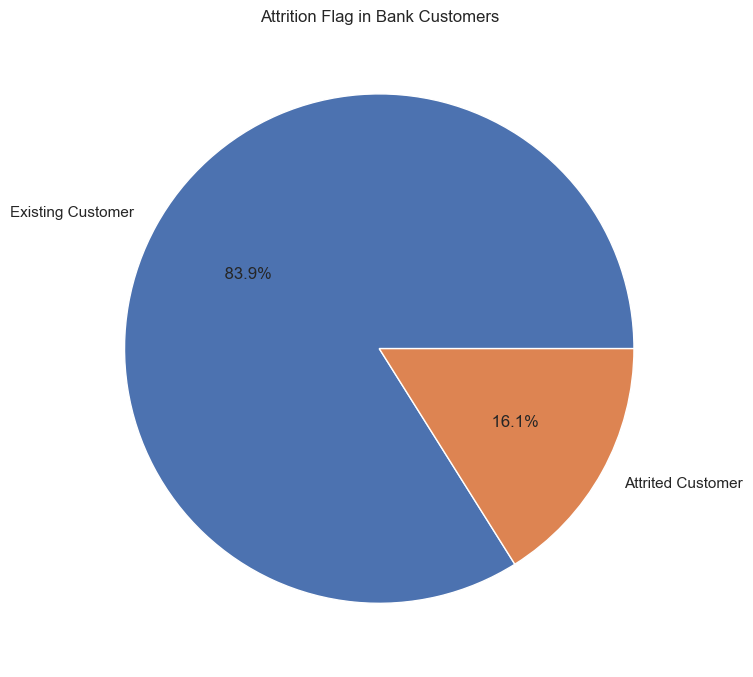

In [227]:
#Calculate percentage of attrited customers
att_count = bank.Attrition_Flag.value_counts().reset_index()
att_count.columns=["Attrition_Flag", "Counts"]

fig, ax = plt.subplots()
ax.pie(att_count.Counts, labels = att_count.Attrition_Flag, autopct ='% .1f%%', startangle = 0)
ax.set_title('Attrition Flag in Bank Customers')

In [222]:
numerical =['Customer_Age','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
            ]
_id = ['CLIENTNUM']
categorical = [i for i in bank.columns if i not in _id+numerical ]

In [223]:
bank[numerical].describe()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Distribution Variables (categorical)

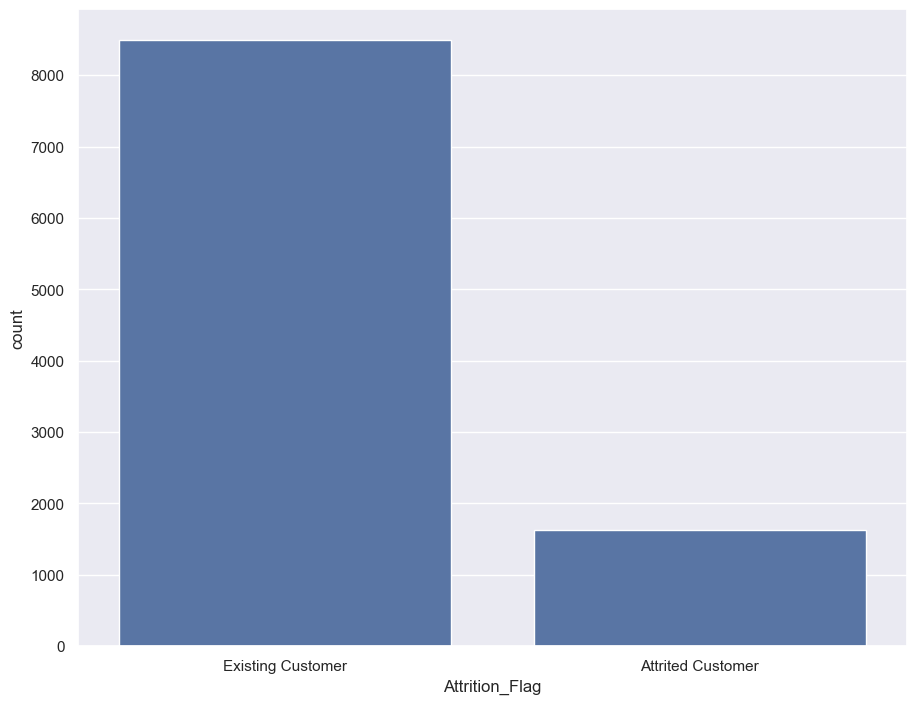

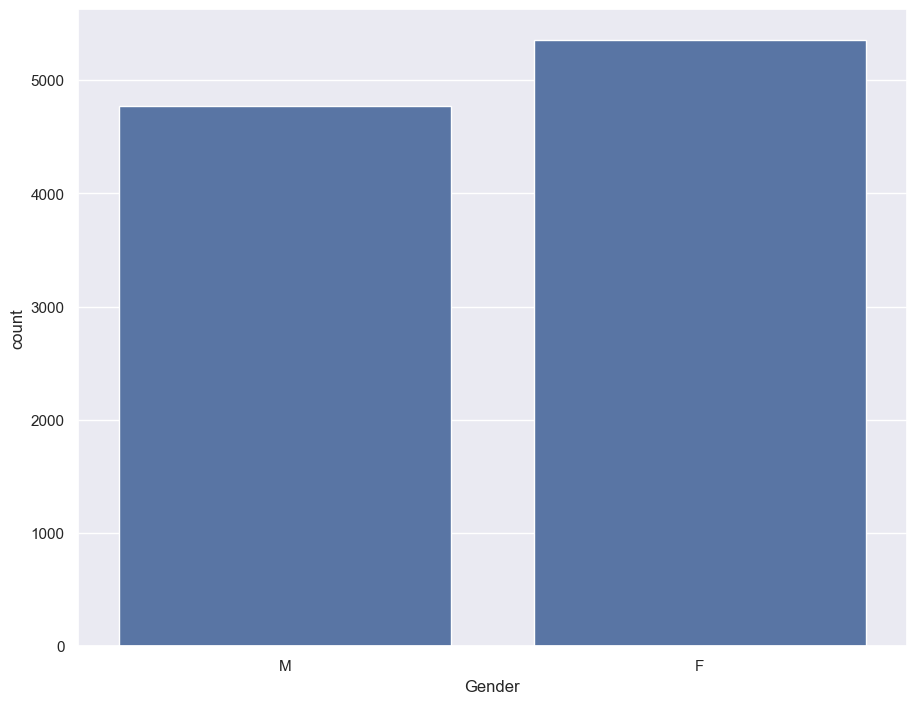

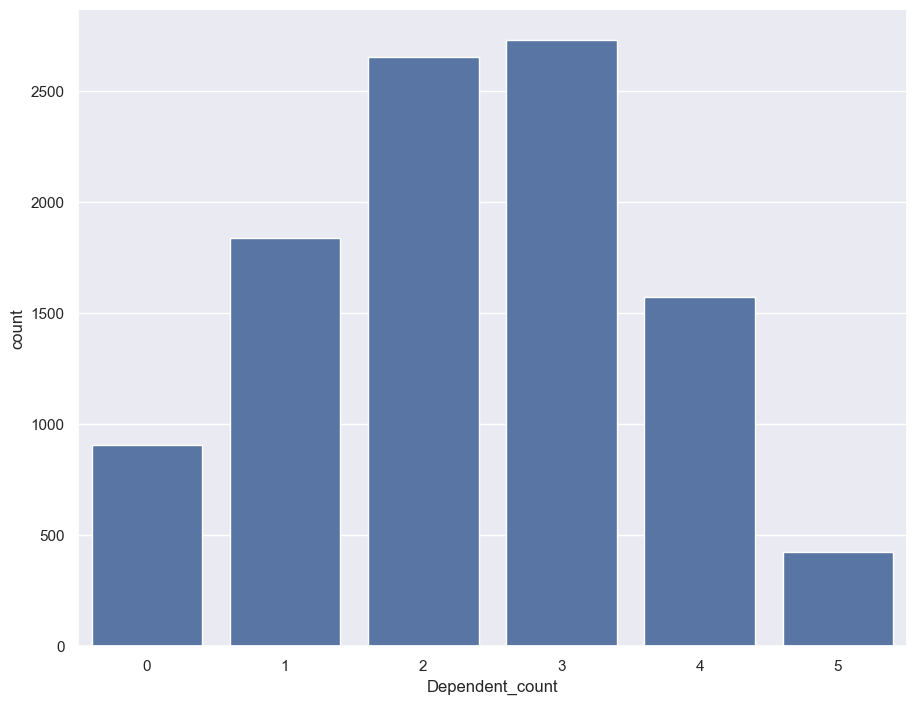

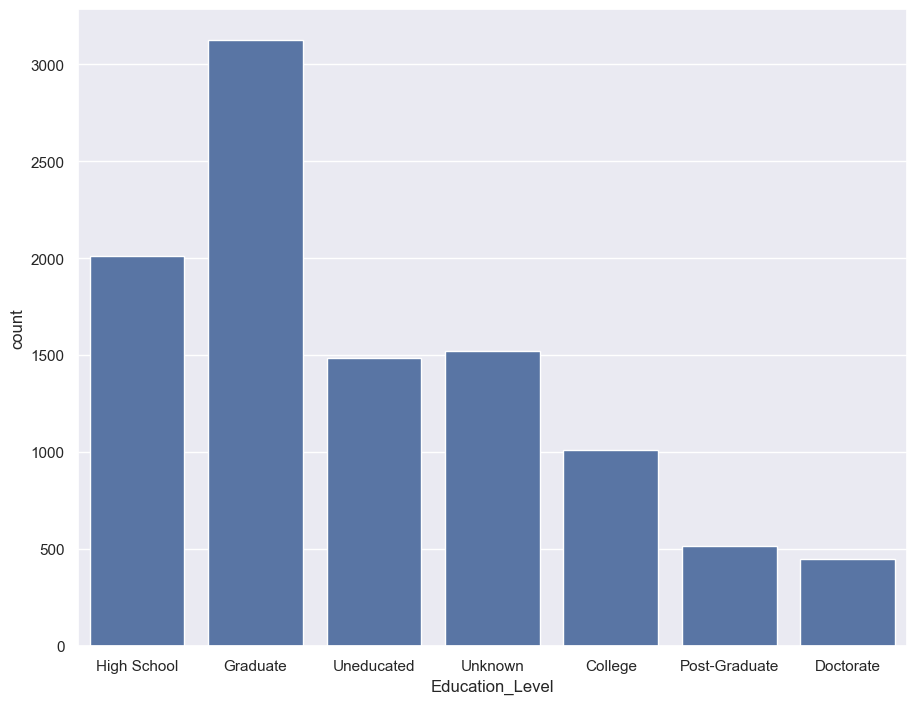

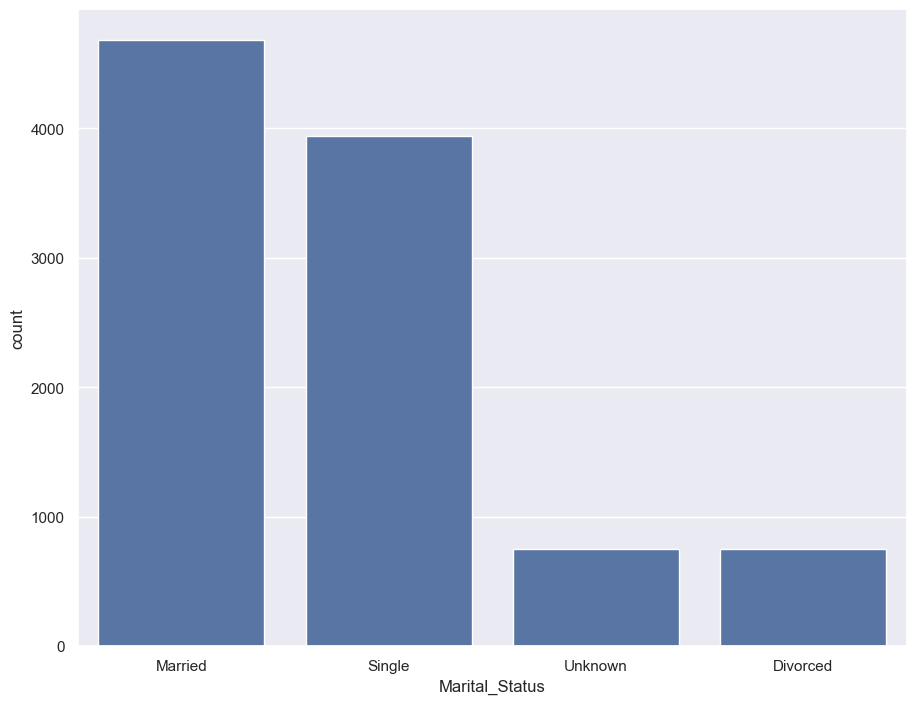

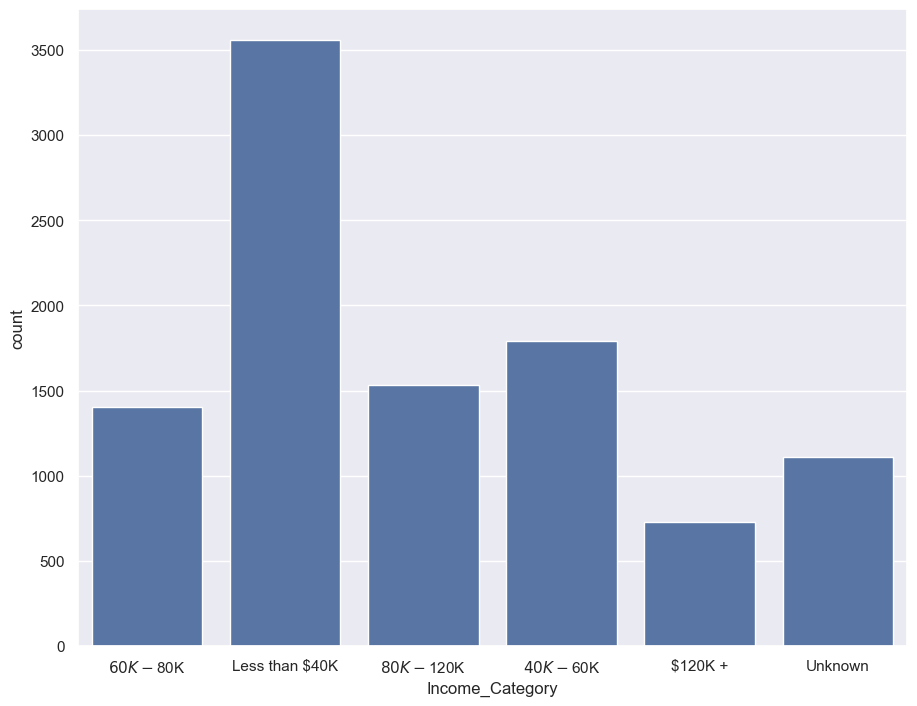

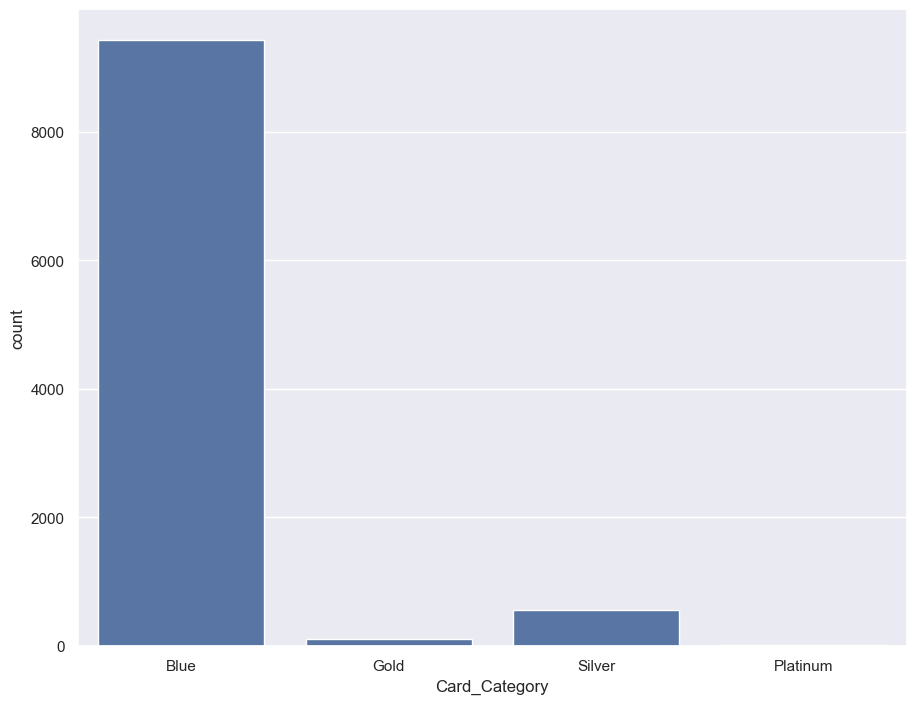

In [224]:
for i, col in enumerate(bank[categorical]):
    plt.figure(i)
    sns.countplot(x=col, data=bank[categorical])

Distribution Variables (numerical)

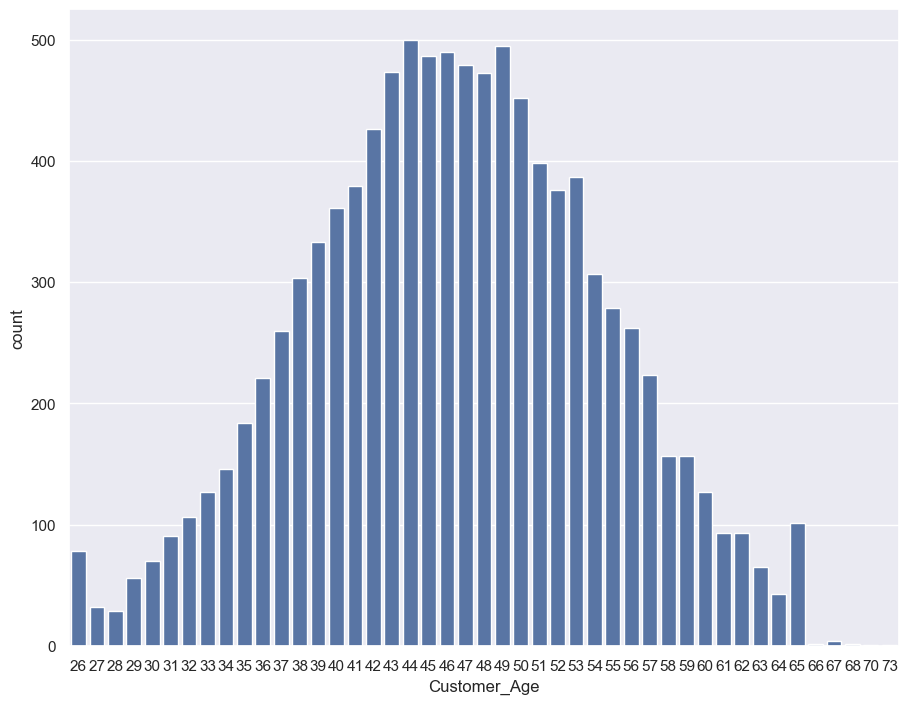

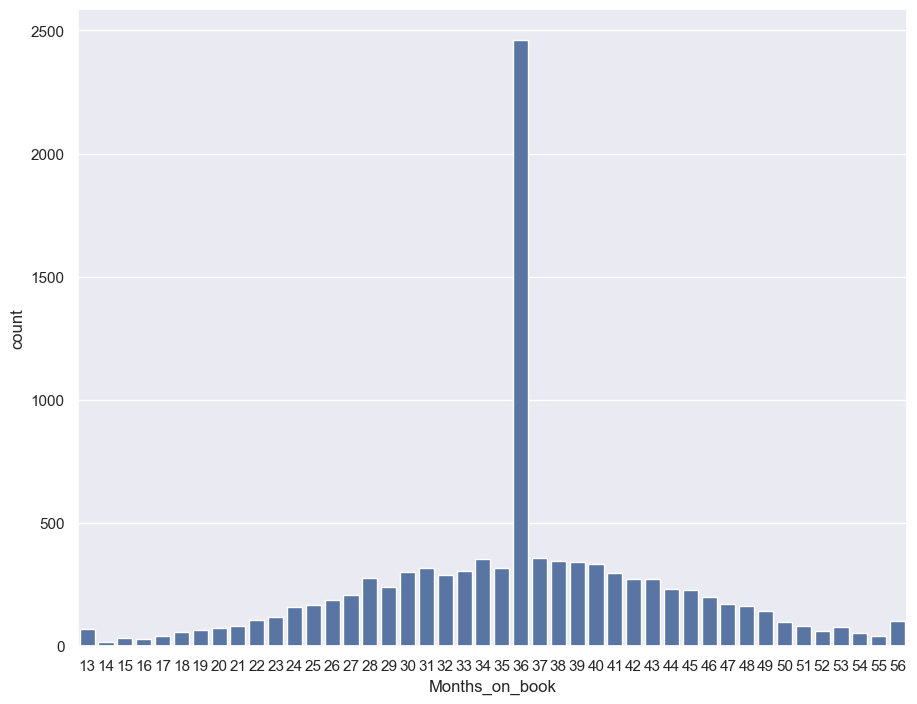

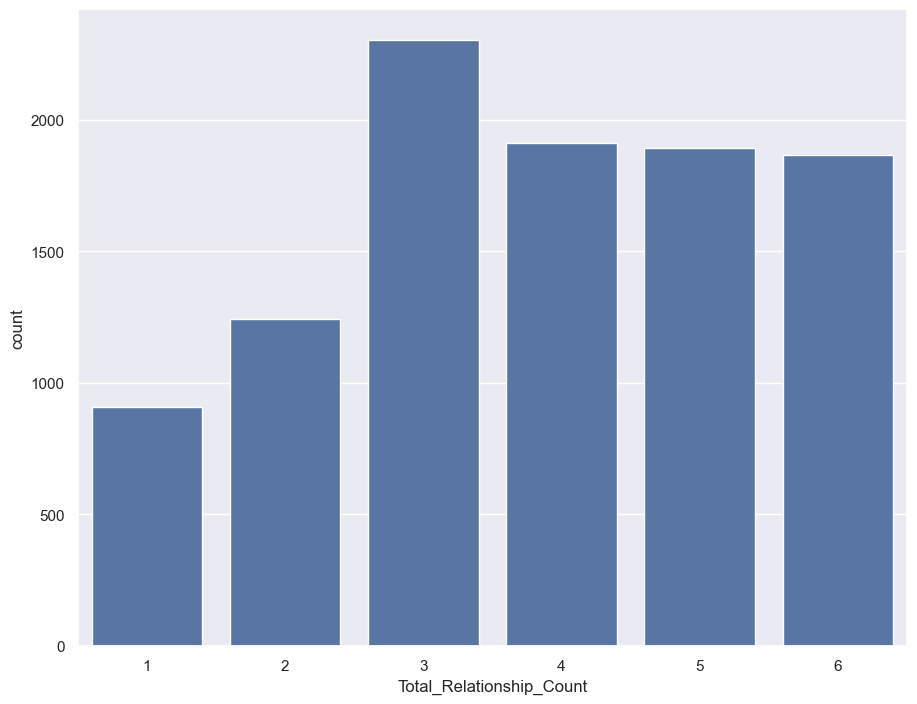

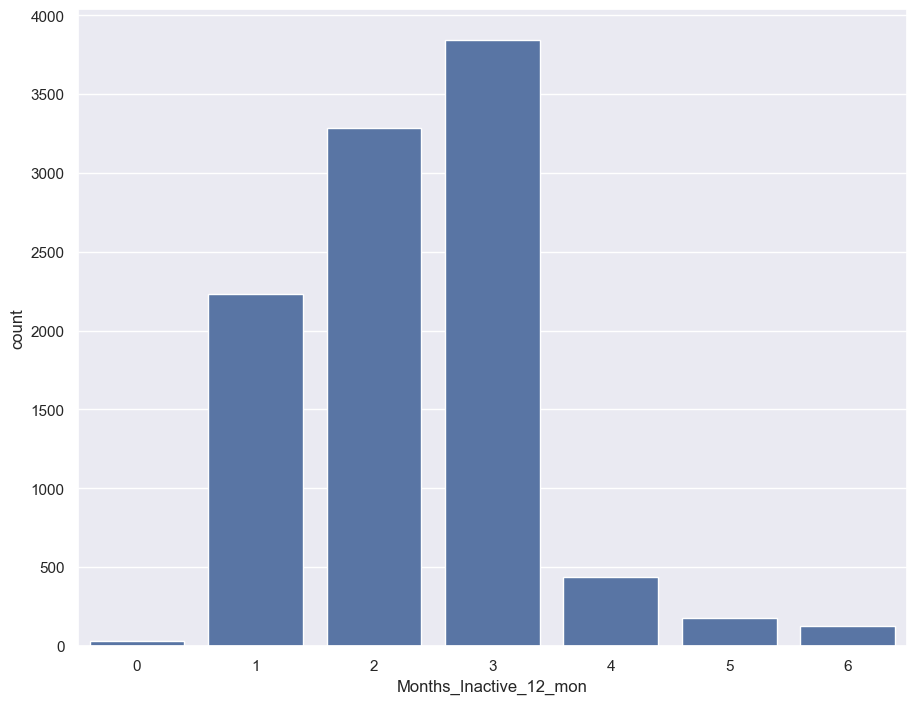

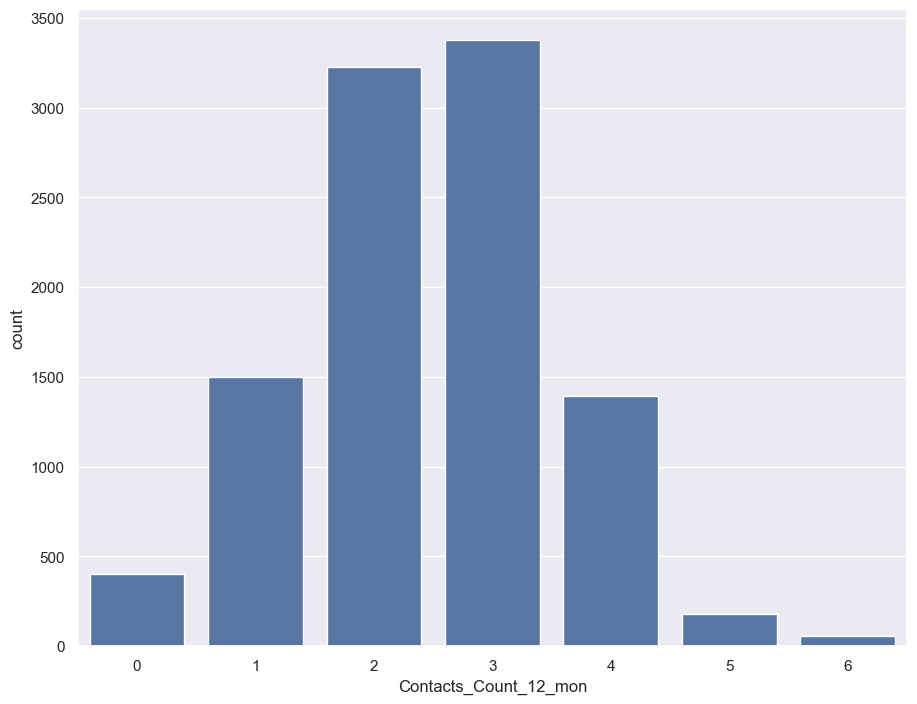

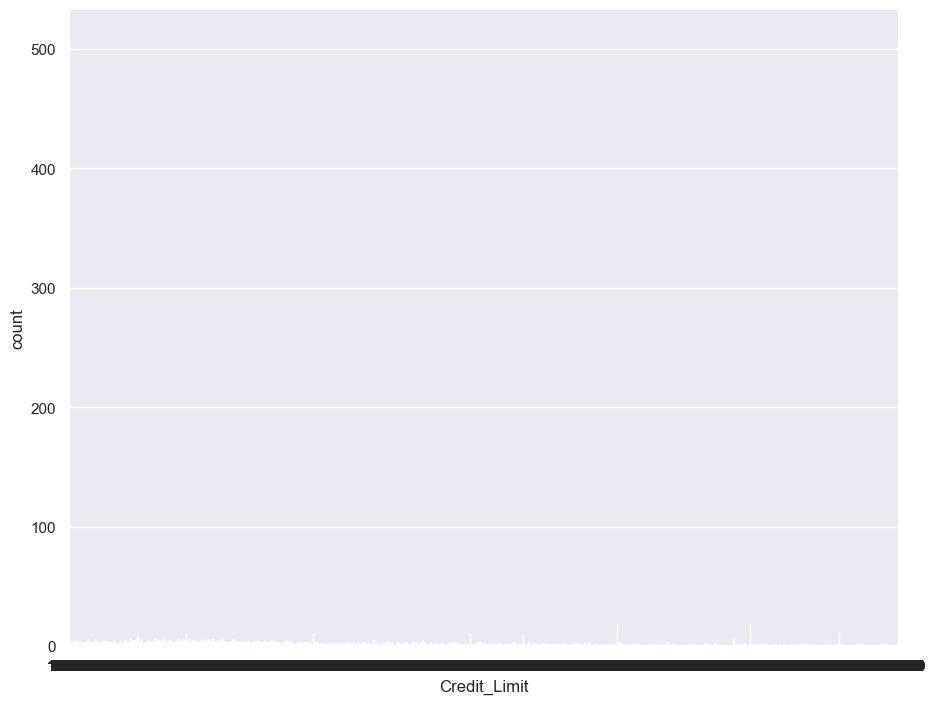

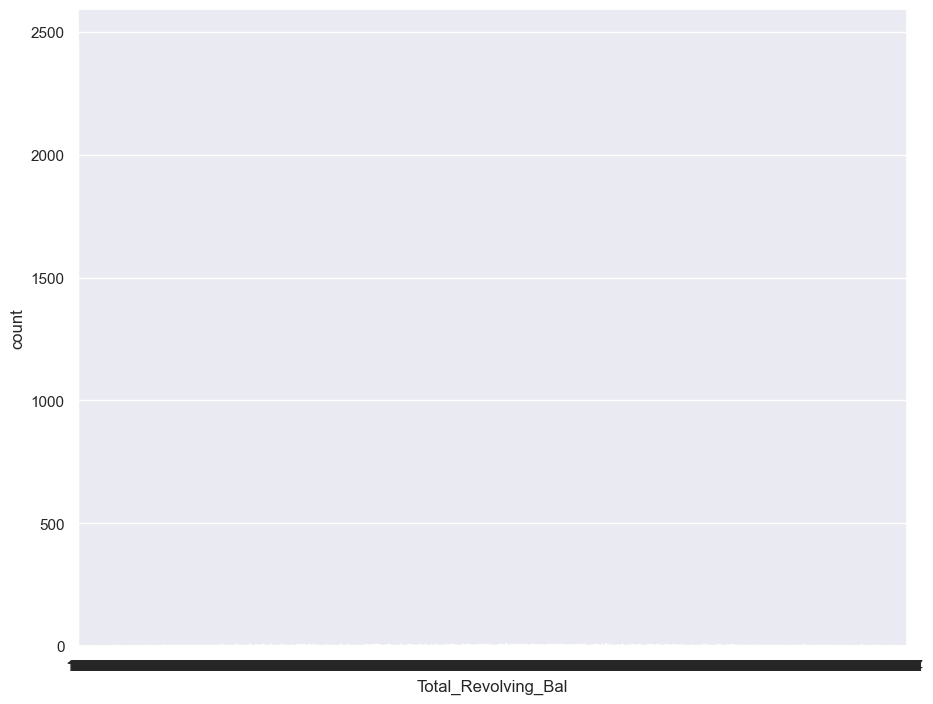

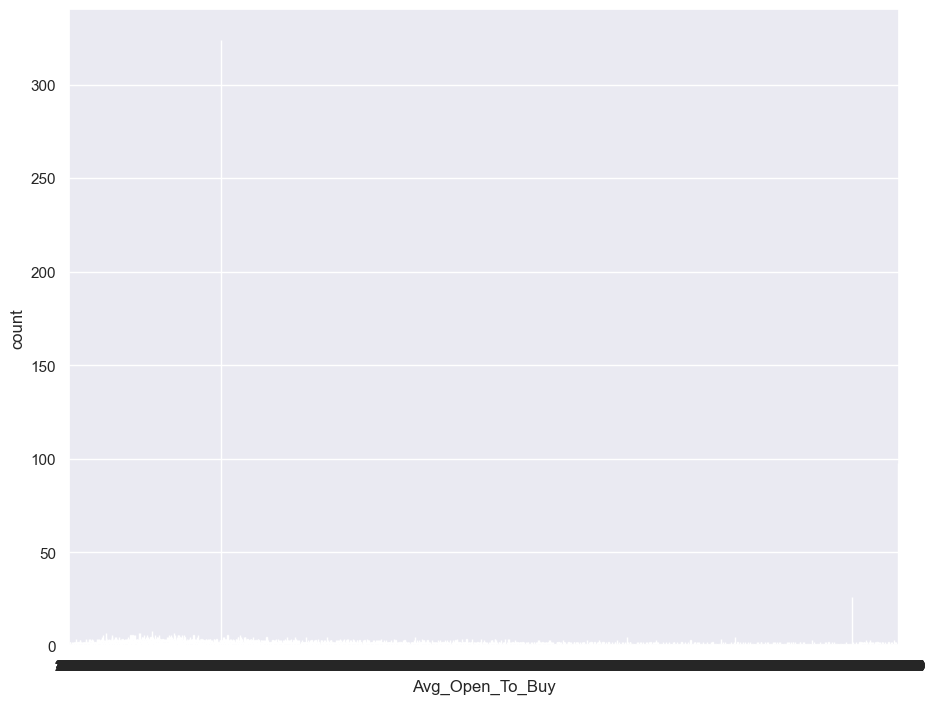

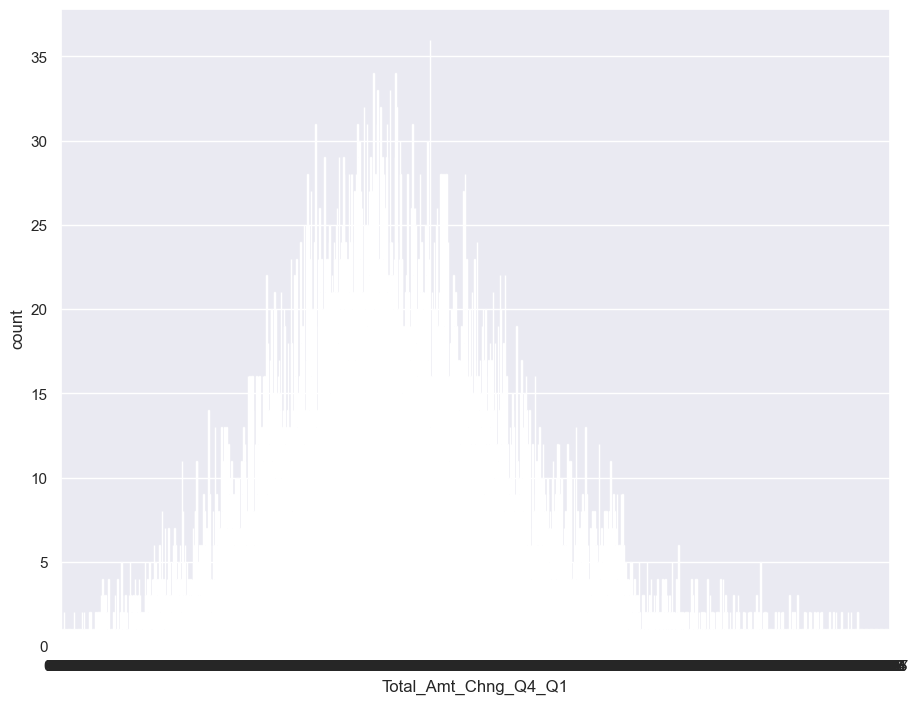

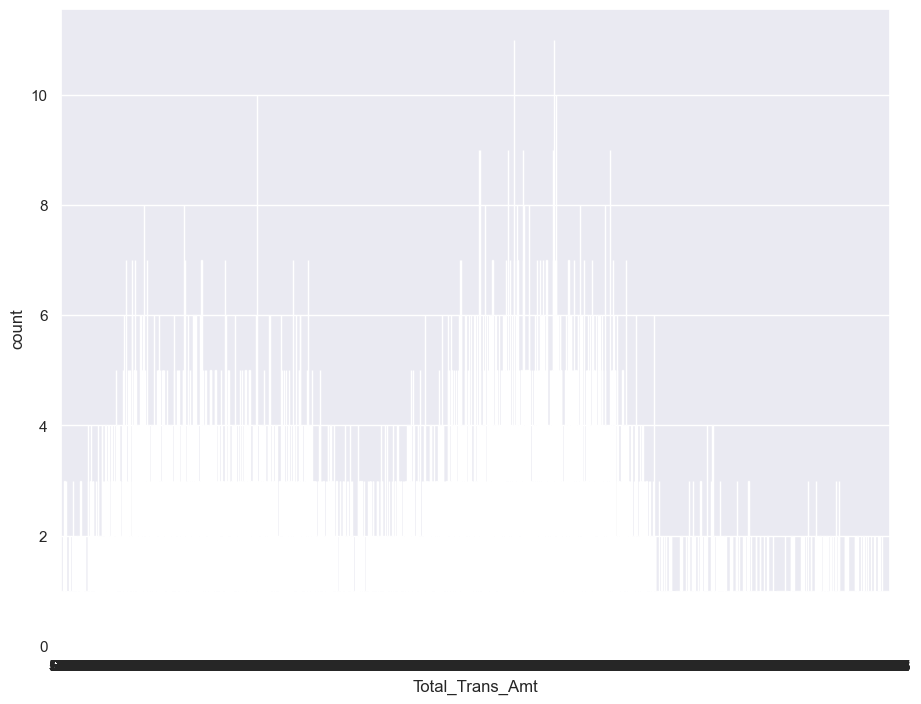

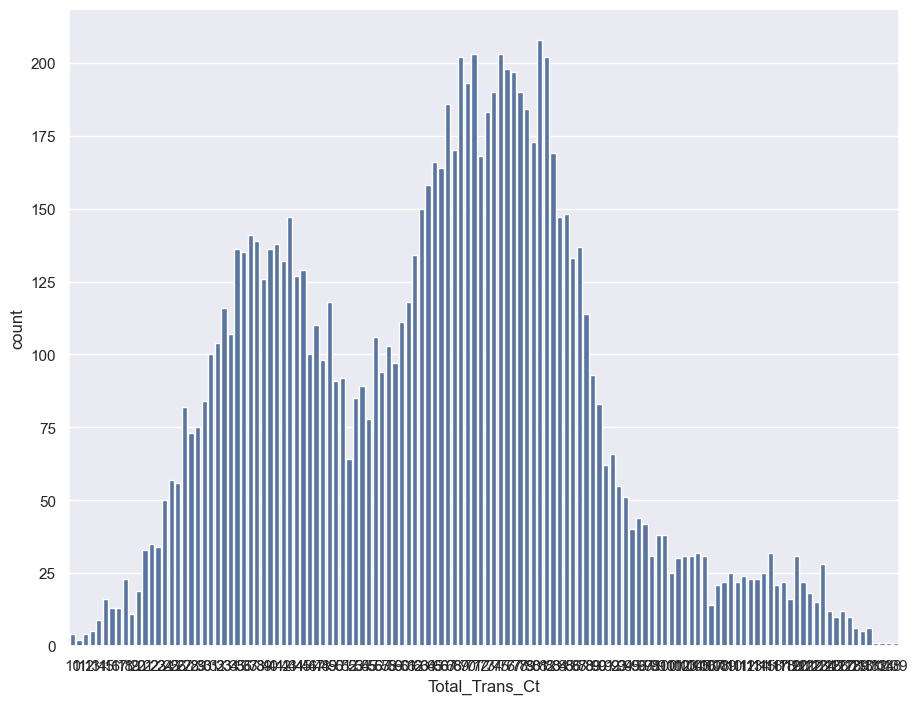

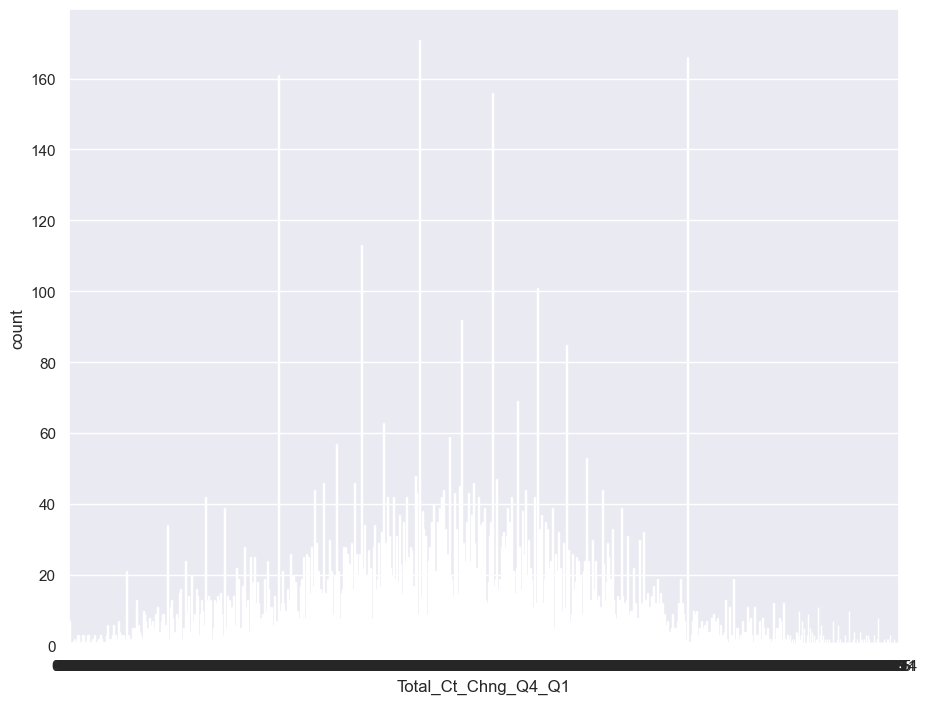

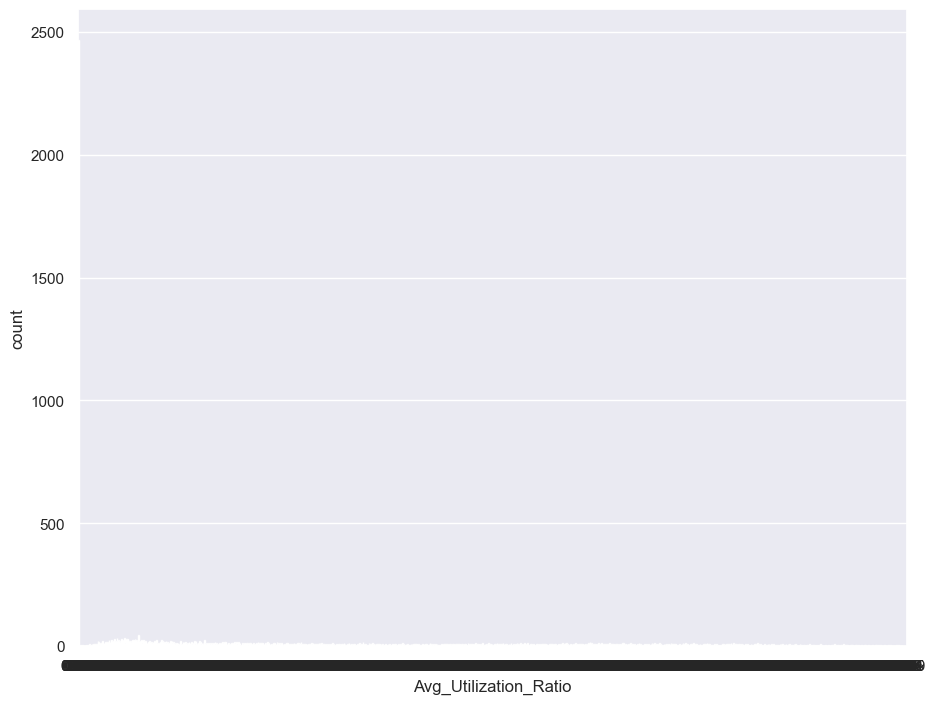

In [23]:
for i, col in enumerate(bank[numerical].columns):
    plt.figure(i)
    sns.countplot(x=col, data=bank[numerical])

In [98]:
bank['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

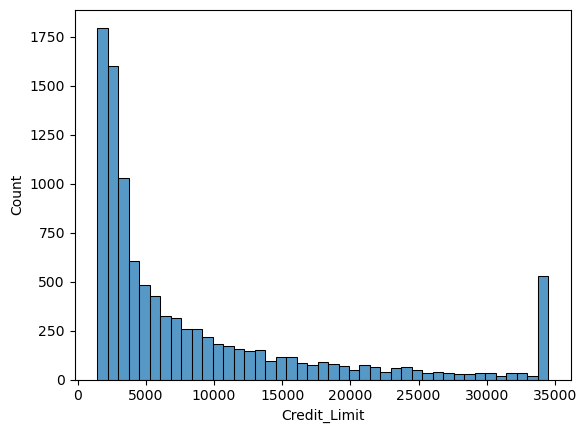

In [84]:
sns.histplot(bank['Credit_Limit'])
plt.show()

In [28]:
bank.duplicated().sum()

0

In [53]:
bank.groupby('Attrition_Flag')['Credit_Limit'].sum()

Attrition_Flag
Attrited Customer    13237336.2
Existing Customer    74178458.9
Name: Credit_Limit, dtype: float64

With Attrition Flag

<Axes: xlabel='Education_Level', ylabel='count'>

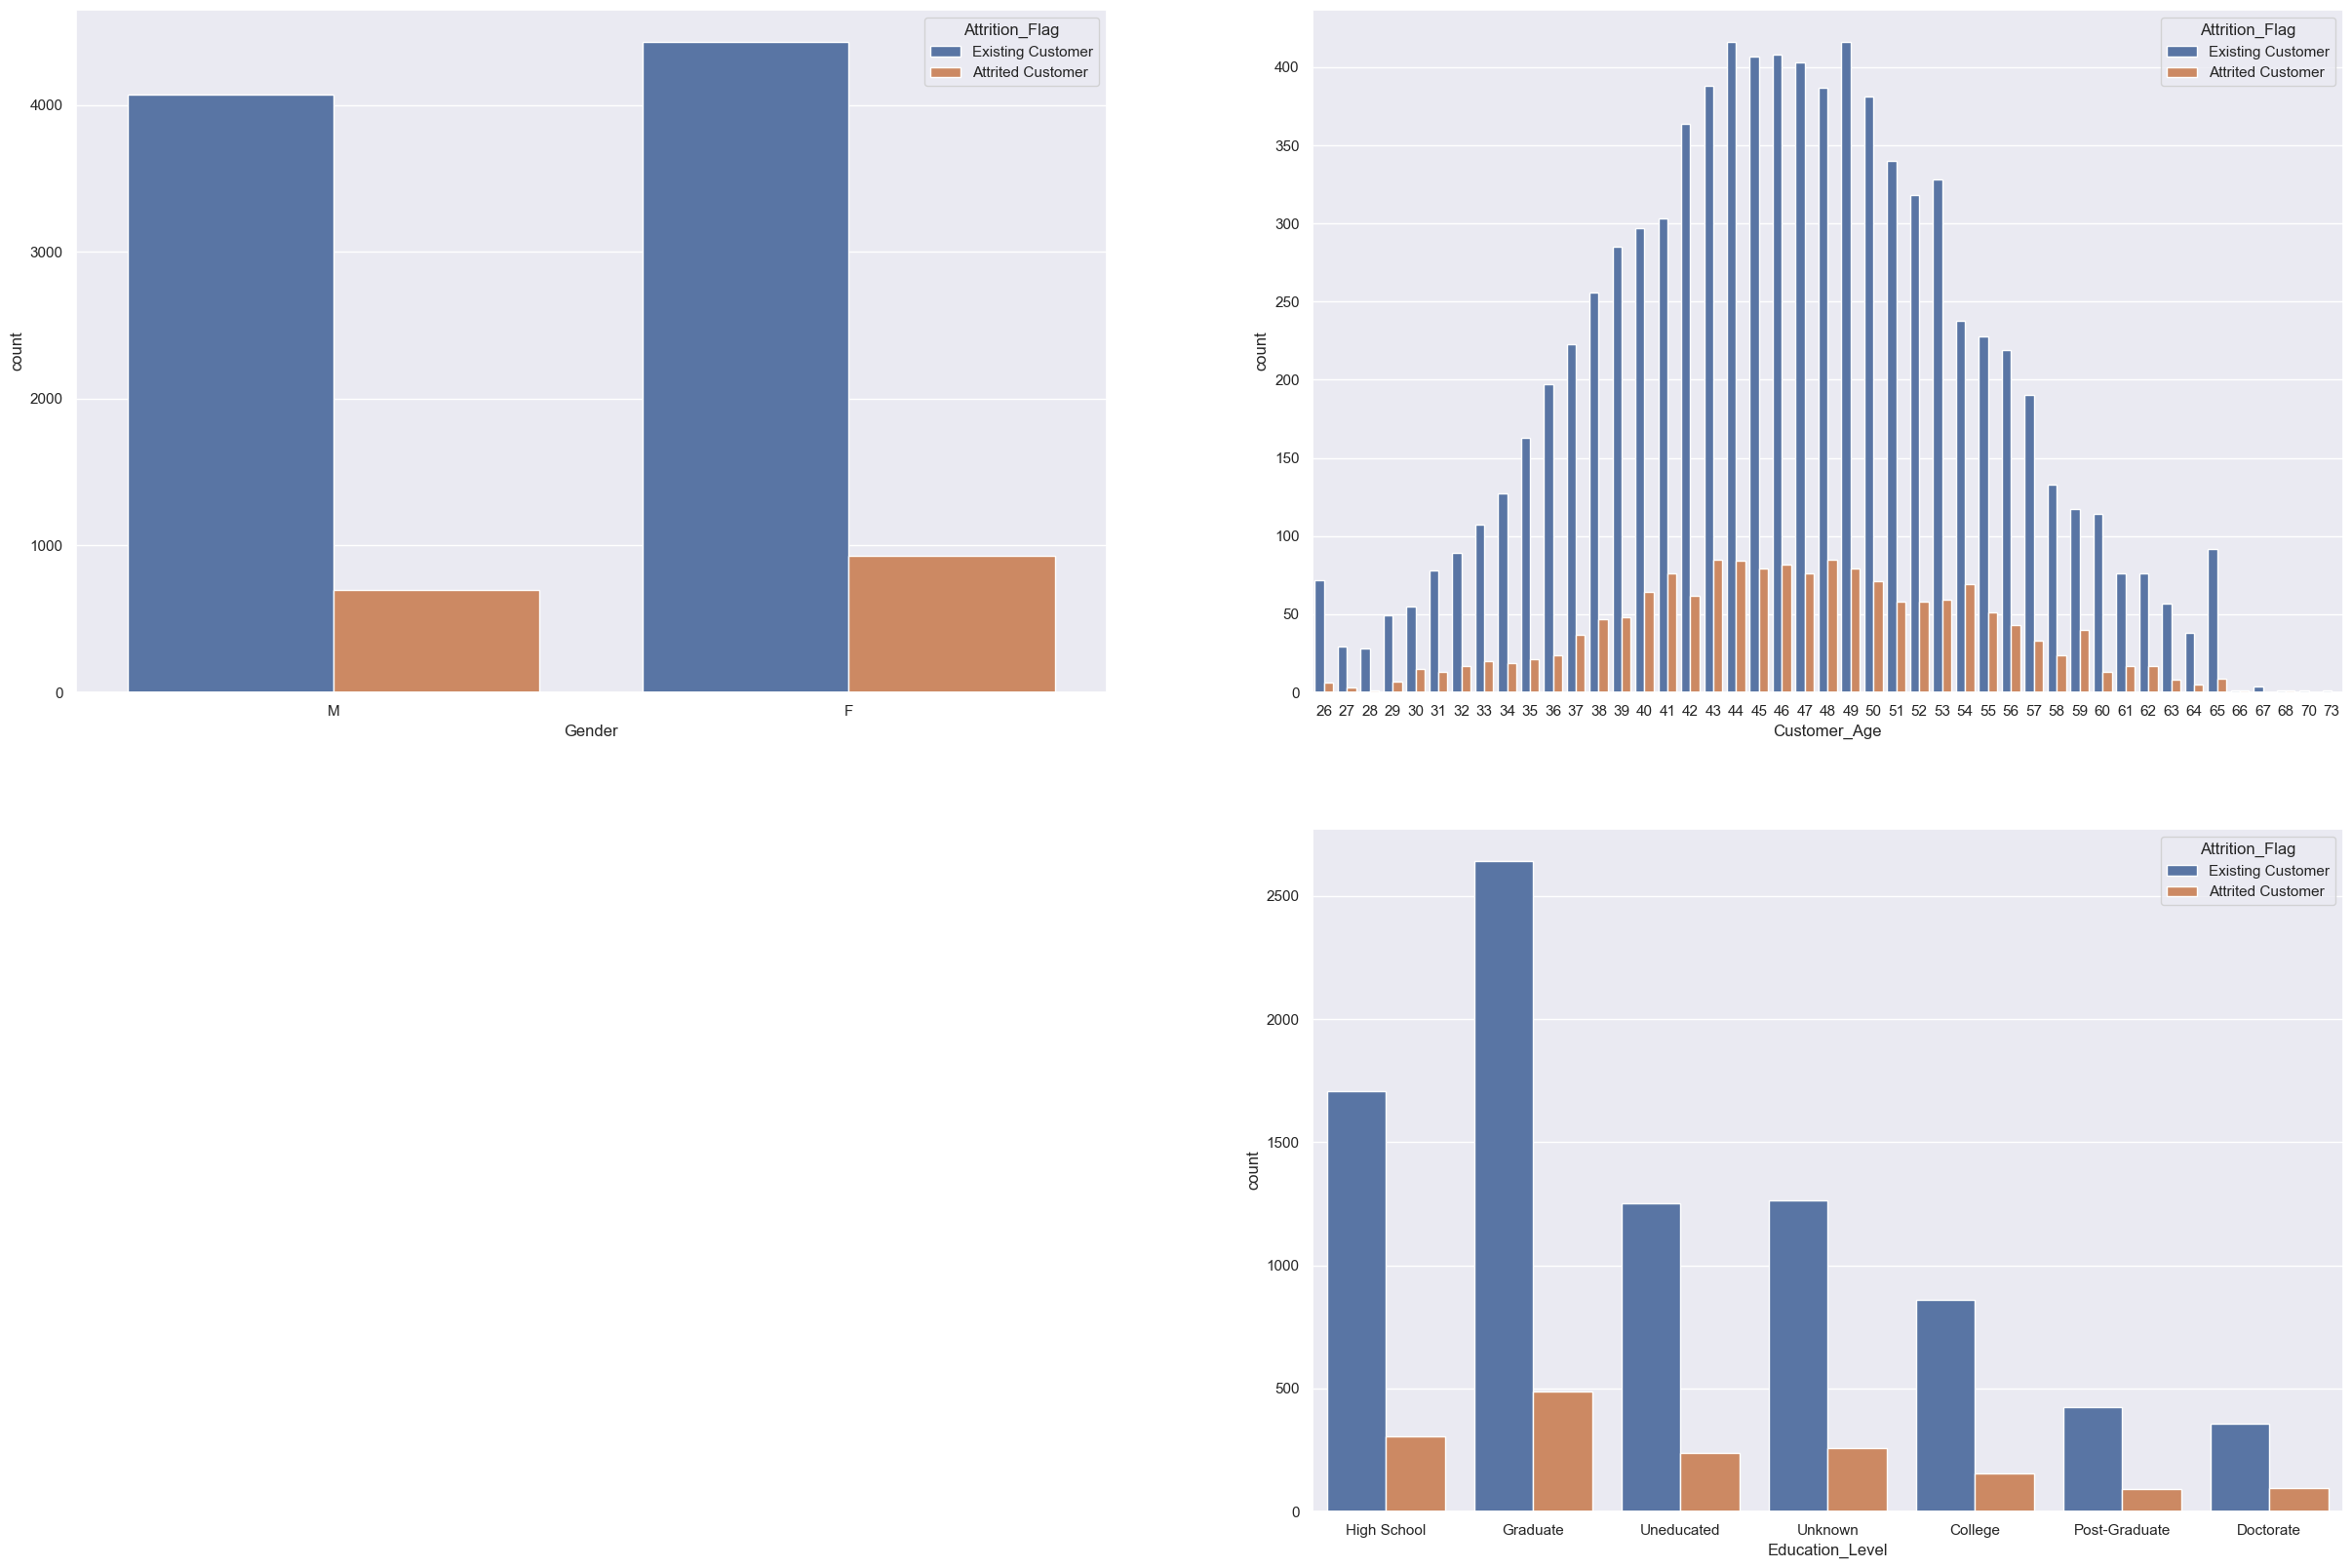

In [246]:
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.countplot(x="Gender",hue="Attrition_Flag",data=bank)
plt.subplot(2,2,2)
sns.countplot(x="Customer_Age",hue="Attrition_Flag",data=bank)
plt.subplot(2,2,4)
sns.countplot(x="Education_Level",hue="Attrition_Flag",data=bank)

Insights :
1) It’s evident that the number of customers currently engaged with the company surpasses those who have ceased their business with the company.

2) In both scenarios, the count of female customers is predominant.

3) We observe that customers tend to discontinue their association with the card company starting from the age of 29, possibly due to attractive offers from competitors.

4) Notably, individuals with high school education and graduates form the majority compared to other education levels.

Looking for outliers

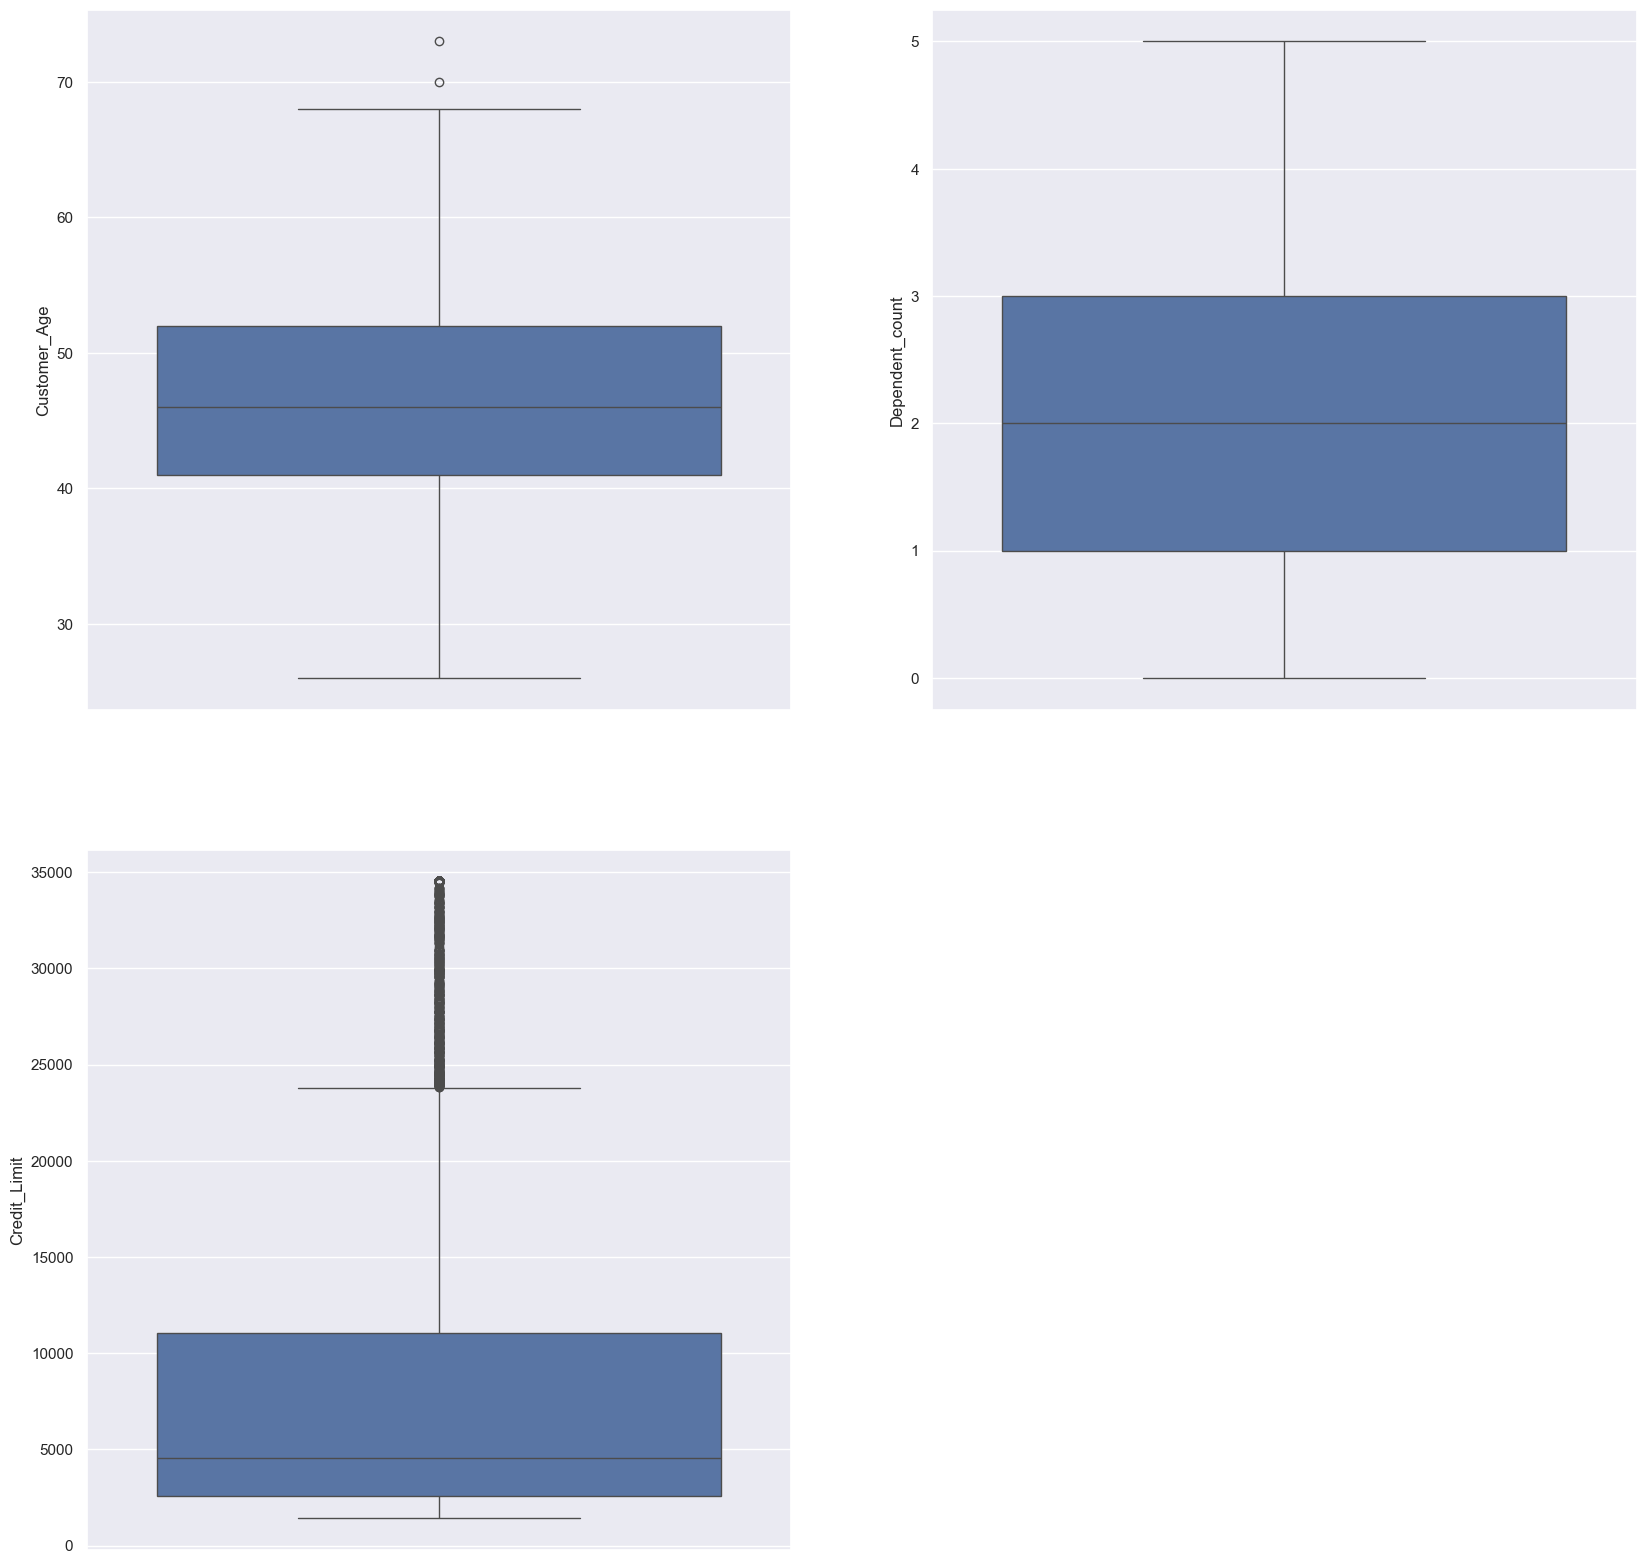

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(bank["Customer_Age"])
plt.subplot(2,2,2)
sns.boxplot(bank["Dependent_count"])
plt.subplot(2,2,3)
sns.boxplot(bank["Credit_Limit"])
plt.show()

insights:
As we can see the credit_limit have a lot of outliers but can't remove them because they are considered to considrable outliers

Looking for Correlation

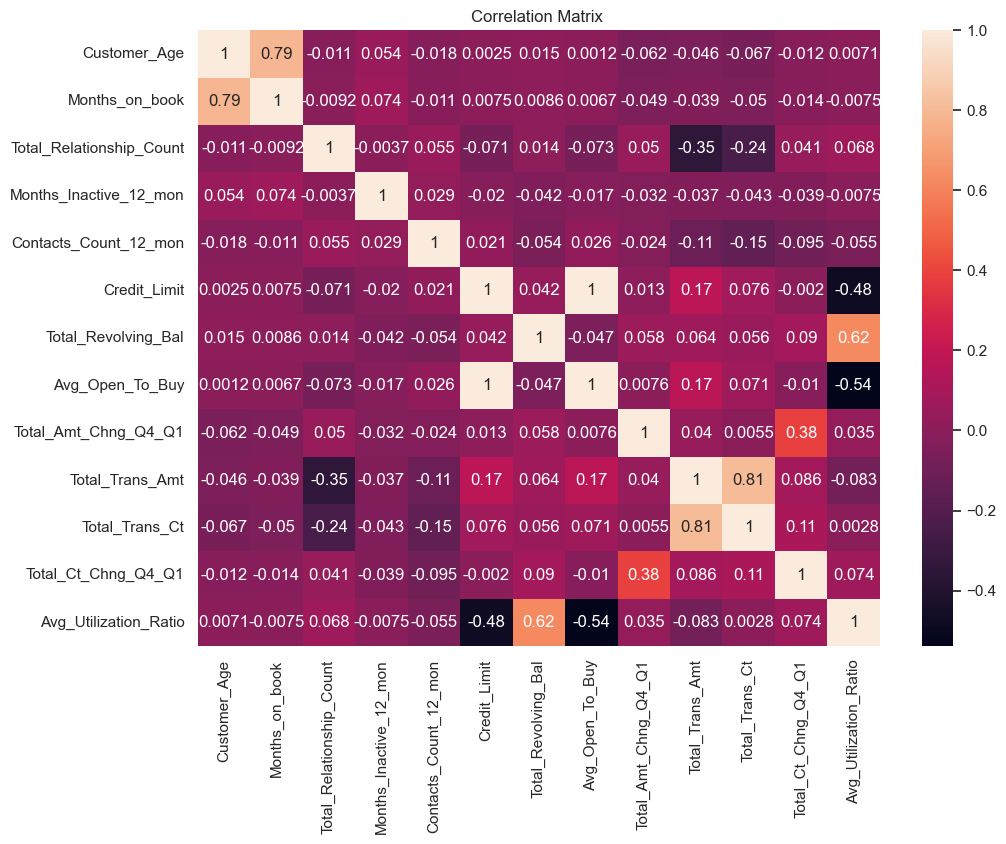

In [235]:
plt.figure(figsize=(11,8))
sns.heatmap(bank[numerical].corr(), annot=True)
plt.title("Correlation Matrix ")
plt.show()

# there are multipe categorical columns. for this we use label and onehot encoding

In [267]:
cols_to_use = ["Customer_Age","Gender","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon",
       "Contacts_Count_12_mon", "Credit_Limit", "Attrition_Flag", "Education_Level","Marital_Status","Income_Category","Card_Category" ]
bank = bank[cols_to_use]
bank.head()

,Customer_Age,Gender,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Attrition_Flag,Education_Level,Marital_Status,Income_Category,Card_Category
0,45,1,39,5,1,3,12691.0,1,High School,Married,$60K - $80K,Blue
1,49,0,44,6,1,2,8256.0,1,Graduate,Single,Less than $40K,Blue
2,51,1,36,4,1,0,3418.0,1,Graduate,Married,$80K - $120K,Blue
3,40,0,34,3,4,1,3313.0,1,High School,Unknown,Less than $40K,Blue
4,40,1,21,5,1,0,4716.0,1,Uneducated,Married,$60K - $80K,Blue


In [268]:
le=LabelEncoder()
bank["Attrition_Flag"]=le.fit_transform(bank["Attrition_Flag"])
bank["Gender"]=le.fit_transform(bank["Gender"])
bank['Attrition_Flag'].replace(['Existing Customer', 'Attrited Customer'],
                        [0, 1], inplace=True)


In [269]:
ohe=pd.get_dummies(bank,columns=["Education_Level","Marital_Status","Income_Category","Card_Category"])
ohe.head()

,Customer_Age,Gender,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Attrition_Flag,Education_Level_College,Education_Level_Doctorate,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,1,39,5,1,3,12691.0,1,False,False,...,False,False,True,False,False,False,True,False,False,False
1,49,0,44,6,1,2,8256.0,1,False,False,...,False,False,False,False,True,False,True,False,False,False
2,51,1,36,4,1,0,3418.0,1,False,False,...,False,False,False,True,False,False,True,False,False,False
3,40,0,34,3,4,1,3313.0,1,False,False,...,False,False,False,False,True,False,True,False,False,False
4,40,1,21,5,1,0,4716.0,1,False,False,...,False,False,True,False,False,False,True,False,False,False


In [270]:
bank=ohe

In [271]:
bank.head()

,Customer_Age,Gender,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Attrition_Flag,Education_Level_College,Education_Level_Doctorate,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,1,39,5,1,3,12691.0,1,False,False,...,False,False,True,False,False,False,True,False,False,False
1,49,0,44,6,1,2,8256.0,1,False,False,...,False,False,False,False,True,False,True,False,False,False
2,51,1,36,4,1,0,3418.0,1,False,False,...,False,False,False,True,False,False,True,False,False,False
3,40,0,34,3,4,1,3313.0,1,False,False,...,False,False,False,False,True,False,True,False,False,False
4,40,1,21,5,1,0,4716.0,1,False,False,...,False,False,True,False,False,False,True,False,False,False


#Train test split

In [272]:
X =bank.drop(columns='Attrition_Flag', axis=1)
y=bank['Attrition_Flag']

In [273]:
X.head()

,Customer_Age,Gender,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,1,39,5,1,3,12691.0,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,49,0,44,6,1,2,8256.0,False,False,True,...,False,False,False,False,True,False,True,False,False,False
2,51,1,36,4,1,0,3418.0,False,False,True,...,False,False,False,True,False,False,True,False,False,False
3,40,0,34,3,4,1,3313.0,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,40,1,21,5,1,0,4716.0,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [274]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=1)
print(f'X_train{X_train.shape}\n, X_test{X_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

X_train(7088, 28)
, X_test(3039, 28)
, y_train(7088,)
, y_test(3039,)


Feature Engineering

In [275]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train{X_train.shape}\n, X_test{X_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

X_train(7088, 28)
, X_test(3039, 28)
, y_train(7088,)
, y_test(3039,)


Applying SMOTE

In [276]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

#Model Building

1. Logistics Regression

Training

In [178]:
lr=LogisticRegression() 
lr.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

Testing

In [209]:
y_pred = lr.predict(X_test) 

Results

In [210]:
y_pred_lr= lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr) 
precision_lr = precision_score(y_test, y_pred_lr) 
recall_lr = recall_score(y_test, y_pred_lr) 
f1_lr = f1_score(y_test, y_pred_lr) 
consufion_lr = confusion_matrix(y_test, y_pred_lr)

In [211]:
print("Accuracy:", accuracy_lr)
print("Precision:",precision_lr)
print("recall:", recall_lr)
print("f1_Score:", f1_lr)
print("Confusion Matrix:\n", consufion_lr )

Accuracy: 0.6814741691345837
Precision: 0.9154855643044619
recall: 0.6836534692277538
f1_Score: 0.7827648114901257
Confusion Matrix:
 [[ 327  161]
 [ 807 1744]]


2. Random Forest

In [277]:
rfc=RandomForestClassifier(criterion='entropy')

Training

In [278]:
rfc.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy')

Testing

In [279]:
y_pred=rfc.predict(X_test)

Results

In [280]:
y_pred_rf= rfc.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
consufion_rf = confusion_matrix(y_test, y_pred_rf)

In [281]:
print("Accuracy:", accuracy_rf)
print("Precision:",precision_rf)
print("recall:", recall_rf)
print("f1_Score:", f1_rf)
print("Confusion Matrix:\n", consufion_rf )

Accuracy: 0.8456729187232642
Precision: 0.8712553495007133
recall: 0.9576636613092905
f1_Score: 0.9124183006535947
Confusion Matrix:
 [[ 127  361]
 [ 108 2443]]


Hyperparameter tuning

In [299]:
# Define the parameters to tune

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [300]:
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv= 5)


In [ ]:
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best hyperparameters found: ", grid_search.best_params_)


In [295]:
rfc2 = RandomForestClassifier(bootstrap= False, max_depth= 20, max_features= 2, min_samples_leaf=1, min_samples_split= 2, n_estimators= 200,random_state=42)

In [288]:
rfc2.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features=2,
                       n_estimators=200)

In [289]:
y_pred_rf2= rfc2.predict(X_test)
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
precision_rf2 = precision_score(y_test, y_pred_rf2)
recall_rf2 = recall_score(y_test, y_pred_rf2)
f1_rf2 = f1_score(y_test, y_pred_rf2)
consufion_rf2 = confusion_matrix(y_test, y_pred_rf2)

In [290]:
print("Accuracy:", accuracy_rf2)
print("Precision:",precision_rf2)
print("recall:", recall_rf2)
print("f1_Score:", f1_rf2)
print("Confusion Matrix:\n", consufion_rf2 )

Accuracy: 0.8259295820993748
Precision: 0.8649819494584837
recall: 0.9392395139161114
f1_Score: 0.9005825972561549
Confusion Matrix:
 [[ 114  374]
 [ 155 2396]]


# Summary of Findings - Credit Card Churn Prediction

## 1. Data Cleaning and Preparation
- Dealt with missing or unclear values in the dataset.
- Removed irrelevant columns like "Naive_Bayes_Classifier_attribution."

## 2. Exploratory Data Analysis (EDA)
- Explored the distribution of the target variable (Attrition_Flag).
- Investigated the distribution of key features across customer segments.
- Identified patterns and trends indicative of potential churn.

## 3. Data Preprocessing
- Encoded categorical variables using one-hot encoding and label encoding.
- Standardized numerical features for improved model performance.

## 4. Addressing Imbalanced Classes
- Implemented oversampling techniques, such as SMOTE, to balance the class distribution.

## 5. Model Building
- Utilized machine learning models like Logistic Regression and Random Forest.
- Evaluated model performance using accuracy, precision, recall, and F1-score metrics.

## 6. Random Forest Model
- The Random Forest model demonstrated promise in identifying both churned and non-churned customers.
- Achieved a good balance between precision and recall.

## 7. Grid Search and Hyperparameter Tuning
- Conducted grid search and hyperparameter tuning to optimize model parameters.
- Observed a slight decrease in accuracy after tuning, but maintained a balanced precision-recall trade-off.

## 8. Final Recommendations
- Implement the Random Forest model with optimized hyperparameters.
- Emphasize continuous monitoring and updating of the model as new data becomes available.
- Consider additional feature engineering to enhance model performance.

## 9. Communication
- Clearly communicate findings and recommendations to stakeholders.
- Highlight the importance of proactive measures for customer retention and potential impact on reducing churn.

